In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product
from sklearn import tree
from sklearn import preprocessing
from IPython.display import Image
import pylab


In [2]:
df = pd.read_csv("/home/sagi/Documents/kaggle/train.csv")

In [3]:
#Which columns have missing values?
for column in df.axes[1]: print 'Number of NaN in column %s: %s' % (column, df[column].isnull().sum())

Number of NaN in column PassengerId: 0
Number of NaN in column Survived: 0
Number of NaN in column Pclass: 0
Number of NaN in column Name: 0
Number of NaN in column Sex: 0
Number of NaN in column Age: 177
Number of NaN in column SibSp: 0
Number of NaN in column Parch: 0
Number of NaN in column Ticket: 0
Number of NaN in column Fare: 0
Number of NaN in column Cabin: 687
Number of NaN in column Embarked: 2


In [92]:
#Examine Age Column
df['Age']

0      22
1      38
2      26
3      35
4      35
5     NaN
6      54
7       2
8      27
9      14
10      4
11     58
12     20
13     39
14     14
15     55
16      2
17    NaN
18     31
19    NaN
20     35
21     34
22     15
23     28
24      8
25     38
26    NaN
27     19
28    NaN
29    NaN
       ..
861    21
862    48
863   NaN
864    24
865    42
866    27
867    31
868   NaN
869     4
870    26
871    47
872    33
873    47
874    28
875    15
876    20
877    19
878   NaN
879    56
880    25
881    33
882    22
883    28
884    25
885    39
886    27
887    19
888   NaN
889    26
890    32
Name: Age, dtype: float64

In [93]:
#Examine Cabin Column
df['Cabin']

0              NaN
1              C85
2              NaN
3             C123
4              NaN
5              NaN
6              E46
7              NaN
8              NaN
9              NaN
10              G6
11            C103
12             NaN
13             NaN
14             NaN
15             NaN
16             NaN
17             NaN
18             NaN
19             NaN
20             NaN
21             D56
22             NaN
23              A6
24             NaN
25             NaN
26             NaN
27     C23 C25 C27
28             NaN
29             NaN
          ...     
861            NaN
862            D17
863            NaN
864            NaN
865            NaN
866            NaN
867            A24
868            NaN
869            NaN
870            NaN
871            D35
872    B51 B53 B55
873            NaN
874            NaN
875            NaN
876            NaN
877            NaN
878            NaN
879            C50
880            NaN
881            NaN
882         

In [94]:
#Examine Embarked Column
df['Embarked']

0      S
1      C
2      S
3      S
4      S
5      Q
6      S
7      S
8      S
9      C
10     S
11     S
12     S
13     S
14     S
15     S
16     Q
17     S
18     S
19     C
20     S
21     S
22     Q
23     S
24     S
25     S
26     C
27     S
28     Q
29     S
      ..
861    S
862    S
863    S
864    S
865    S
866    C
867    S
868    S
869    S
870    S
871    S
872    S
873    S
874    C
875    C
876    S
877    S
878    S
879    C
880    S
881    S
882    S
883    S
884    S
885    Q
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, dtype: object

In [4]:
#Replacing NA values with column means. Note that the Cabin column and Embarked Column won't be used in prediction
#so we don't really care to fix their missing values.
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [146]:
df[['Pclass','Survived']]

,Pclass,Survived
0,3,0
1,1,1
2,3,1
3,1,1
4,3,0
5,3,0
6,1,0
7,3,0
8,3,1
9,2,1


In [5]:
#Create mosaic plots to understand visually which categorical variables are correlated with survival
vals = [row[1:3] for row in pd.DataFrame.itertuples(df[['Pclass','Survived']])]
counts = {item: vals.count(item) for item in vals}
mosaic(counts,gap=.05,title = 'Pclass vs. Survived')
plt.show()

vals = [row[1:3] for row in pd.DataFrame.itertuples(df[['Sex','Survived']])]
counts = {item: vals.count(item) for item in vals}
mosaic(counts,gap=.05,title = 'Sex vs. Survived')
plt.show()

In [25]:
#From Mosaic plots we can really see that Pclass and Sex have strong relationships with Survivability

#plt.figure(1,figsize = (9,6)).add_subplot(111).boxplot(df.loc[df['Survived'] == 1]['Age'])
plt.boxplot(np.array(df.loc[df['Survived'] == 1]['Fare']))
plt.show()
#df[df['Sex'] == 'female']['Survived'].mean()

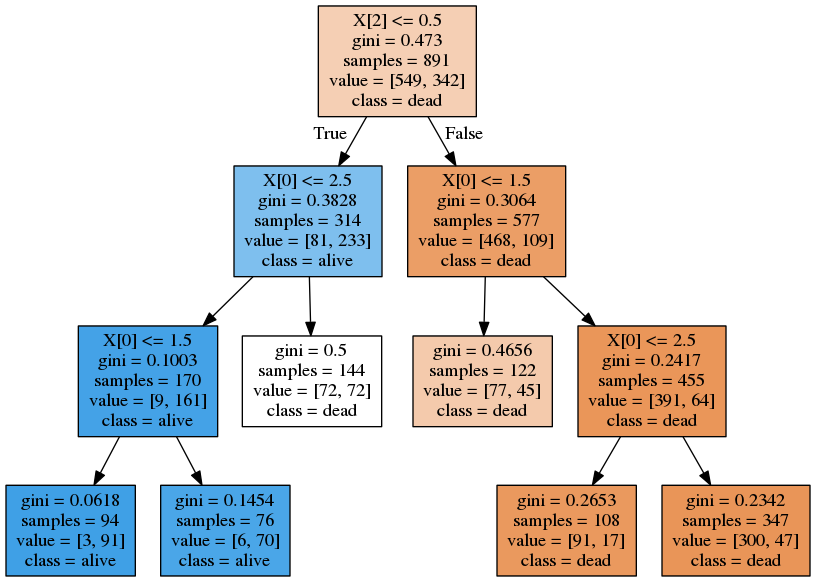

In [94]:
from sklearn.externals.six import StringIO
import pydot

#pd.get_dummies(df['Sex'])

clf = tree.DecisionTreeClassifier()
clf.fit(pd.get_dummies(pd.concat([df['Sex'],df['Pclass']],axis=1)),df['Survived'])

dot_data = StringIO()
tree.export_graphviz(clf,out_file = dot_data,filled = True,class_names = ['dead','alive'])
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())
